<a href="https://colab.research.google.com/github/ashdiqqi/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

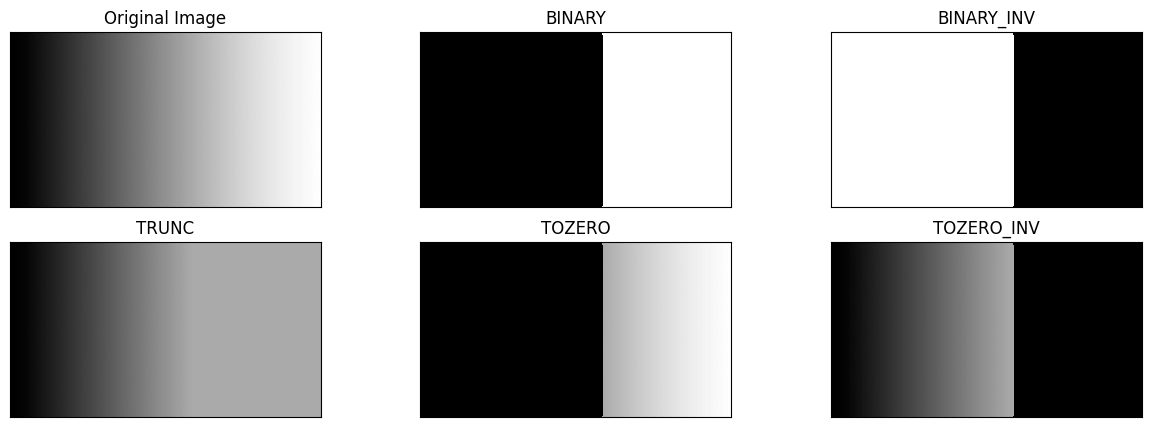

In [ ]:
filename = ('/content/drive/MyDrive/Assets/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selainitu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
import numpy as np

# Fungsi untuk menghitung Otsu's threshold secara manual
def otsu_threshold(image):
    pixel_counts = np.bincount(image.ravel(), minlength=256)
    total_pixels = image.size

    current_max, threshold = 0, 0
    sum_total, sum_foreground, weight_background, weight_foreground = 0, 0, 0, 0

    for i in range(256):
        sum_total += i * pixel_counts[i]

    for i in range(256):
        weight_background += pixel_counts[i]
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_foreground += i * pixel_counts[i]

        mean_background = sum_foreground / weight_background
        mean_foreground = (sum_total - sum_foreground) / weight_foreground

        # Varians antar-kelas
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Cari nilai threshold yang memaksimalkan varians antar-kelas
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i

    return threshold



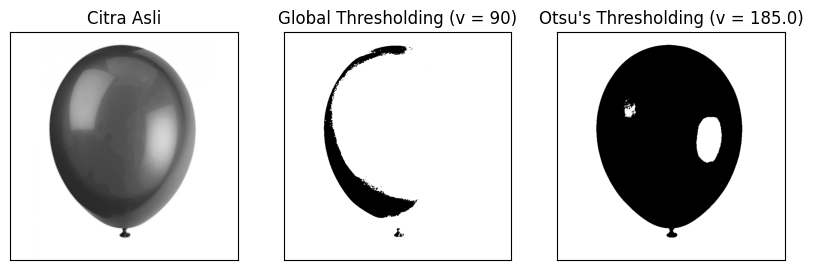

In [ ]:
# Citra contoh (grayscale image dalam bentuk numpy array)
filename = '/content/drive/MyDrive/Assets/balloon.jpg'
img = cv.imread(filename, 0)

# Aplikasikan Gaussian Blur (untuk mengurangi noise)
blur = cv.GaussianBlur(img, (5, 5), 0)

# Cari nilai threshold menggunakan algoritma Otsu manual
otsu_thresh = otsu_threshold(blur)

# Global thresholding (v = 90)
thresh = 90
th1 = np.where(blur >= thresh, 255, 0).astype(np.uint8)

# Otsu's Thresholding menggunakan algoritma manual
th2 = np.where(blur >= otsu_thresh, 255, 0).astype(np.uint8)

# Tampilkan hasilnya
x = ("Otsu's Thresholding (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


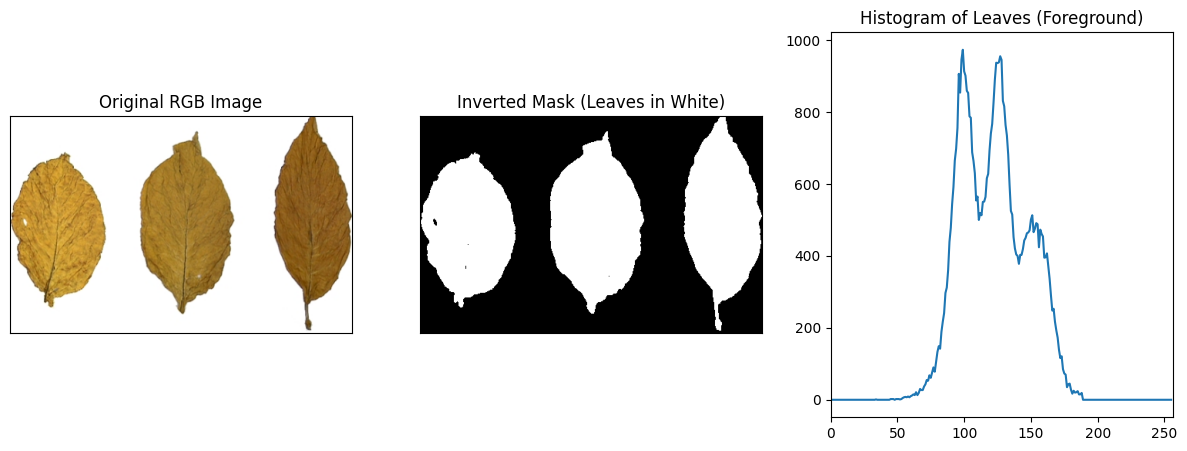

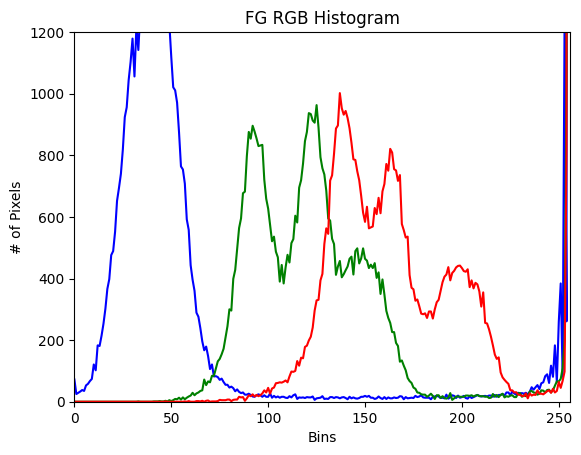

-1

In [3]:
# Load the image in color (BGR format)
filename = '/content/drive/MyDrive/Assets/tobacco.jpg'
img_color = cv.imread(filename)  # Load the image in color (BGR)

# Convert the image from BGR to RGB for displaying in matplotlib
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

# Load the image in grayscale
img_gray = cv.imread(filename, cv.IMREAD_GRAYSCALE)  # Load as grayscale image

# Step 1: Use Otsu's method to create a binary mask where leaves (foreground) are white
ret, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Invert the mask so that leaves are white and the background is black
mask_inv = cv.bitwise_not(mask)

# Step 2: Calculate the histogram for the segmented (foreground) image using the inverted mask
hist_foreground = cv.calcHist([img_gray], [0], mask_inv, [256], [0, 256])

# Step 3: Plot the original RGB image, mask, and histogram
plt.figure(figsize=(15, 5))

# Plot the original RGB image
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)  # Display the RGB image
plt.title('Original RGB Image')
plt.xticks([]), plt.yticks([])

# Plot the inverted mask (foreground is white)
plt.subplot(1, 3, 2)
plt.imshow(mask_inv, cmap='gray')  # Display the mask
plt.title('Inverted Mask (Leaves in White)')
plt.xticks([]), plt.yticks([])

# Plot the histogram of the foreground (leaves)
plt.subplot(1, 3, 3)
plt.plot(hist_foreground)
plt.title('Histogram of Leaves (Foreground)')
plt.xlim([0, 256])

plt.show()

# Second part: Plot flattened color histogram of another image
chans = cv.split(img_color)
colors = ('b', 'g', 'r')

plt.figure()
plt.title('FG RGB Histogram')
plt.xlabel('Bins')
plt.ylabel('# of Pixels')

# Plot histograms for each color channel
for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.ylim([0, 1200])  # Adjusting y-limit based on your requirement

plt.show()
cv.waitKey(0)


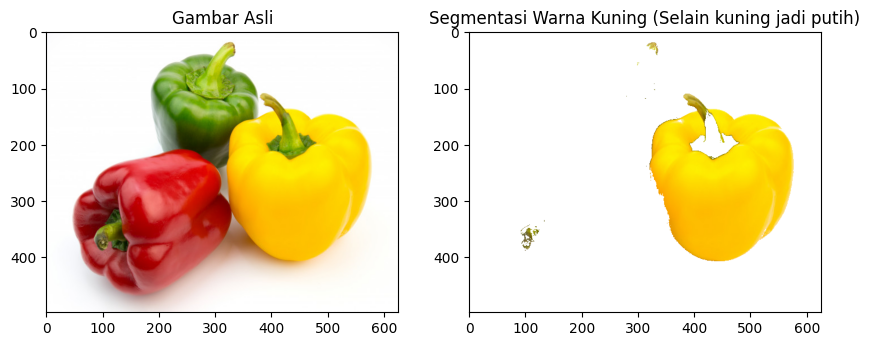

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Baca gambar
filename = '/content/drive/MyDrive/Assets/peppers.jpg'
img = cv.imread(filename)  # Load the image in color (BGR)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Konversi ke RGB untuk matplotlib

# Langkah 2: Ubah ke bentuk 2D, tiap piksel sebagai fitur [R,G,B]
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Langkah 3: Tentukan k untuk K-Means
k = 2  # Kita pilih 3 kluster, bisa disesuaikan
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Langkah 4: Konversi kembali ke 8-bit
centers = np.uint8(centers)
labels = labels.flatten()

# Langkah 5: Hanya tampilkan warna kuning
# Mendefinisikan rentang HSV untuk warna kuning
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Rentang warna kuning dalam HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Membuat mask untuk warna kuning
mask = cv.inRange(img_hsv, lower_yellow, upper_yellow)

# Buat background putih
white_background = np.full_like(img, 255)

# Terapkan mask: jika di luar area kuning, jadikan putih
result = np.where(mask[:, :, np.newaxis] == 0, white_background, img)

# Langkah 6: Tampilkan hasilnya
plt.figure(figsize=(10, 5))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.axis('on')

# Tampilkan hasil segmentasi warna kuning
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title('Segmentasi Warna Kuning (Selain kuning jadi putih)')
plt.axis('on')

plt.show()
